In [1]:
import tensorflow as tf

tf.__version__

'2.11.0'

In [16]:
import numpy as np
import pywt
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

print('sumon')

sumon


In [17]:
img = cv2.imread('./test_img/rings.jpg')
img2 = cv2.imread('./test_img/cyst.jpg')
img3= cv2.imread('./test_img/miliria.jpg')
img.shape

(177, 200, 3)

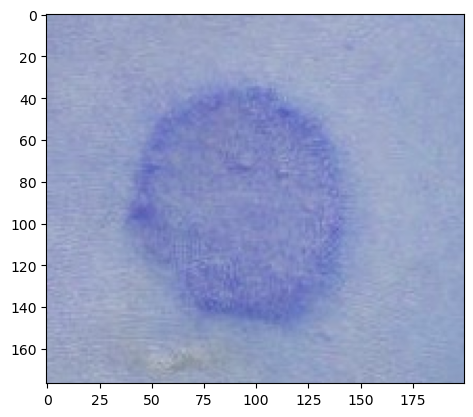

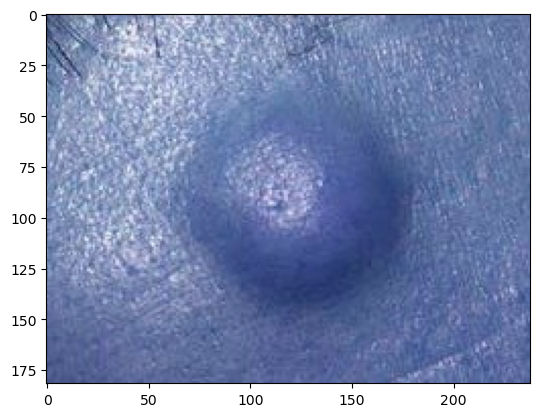

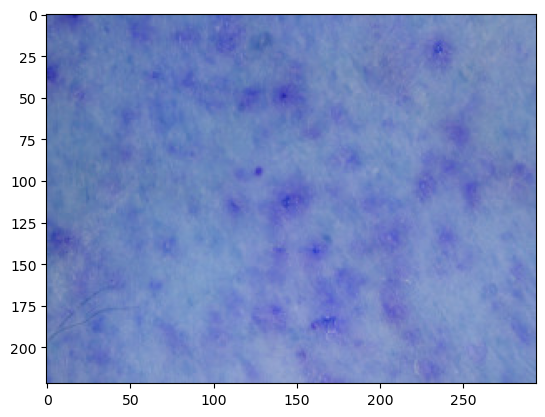

In [4]:
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

In [19]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

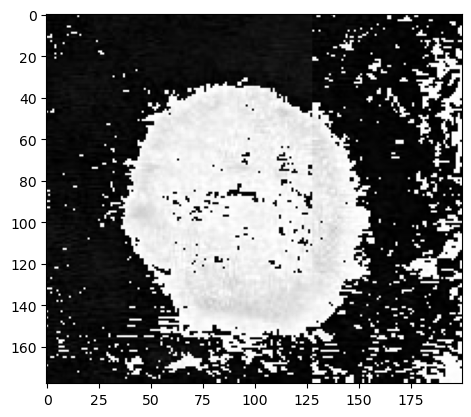

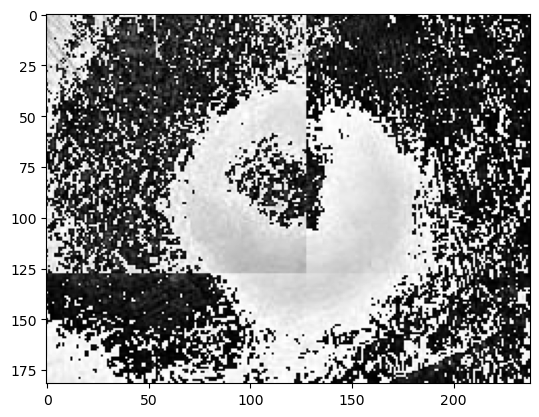

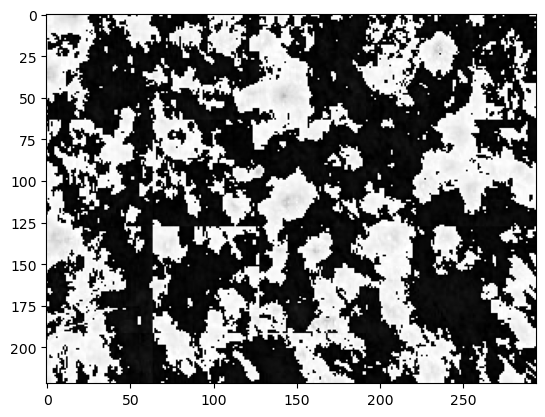

In [20]:
im_har=w2d(img,'db1',7)
plt.imshow(im_har,cmap='gray')
plt.show();

im_har2=w2d(img2,'db1',7)
plt.imshow(im_har2,cmap='gray')
plt.show();

im_har3=w2d(img3,'db1',6)
plt.imshow(im_har3,cmap='gray')
plt.show();

In [8]:
print(1000)
print("sumon khan")

1000
sumon khan


In [21]:
path_to_data= "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [22]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./Dataset/cyst', './Dataset/miliria', './Dataset/ringworm']

In [23]:
d_file_names_dict = {}
for img_dir in img_dirs:
    d_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    d_file_names_dict[d_name] = file_list
d_file_names_dict

{'cyst': ['./Dataset/cyst\\cysst.jpg',
  './Dataset/cyst\\cyst.jpg',
  './Dataset/cyst\\epidermal-inclusion-cyst (1).jpg',
  './Dataset/cyst\\Epidermoid-cyst-txtbk-image (1).jpg',
  './Dataset/cyst\\Image_1.jpg',
  './Dataset/cyst\\Image_12.jpg',
  './Dataset/cyst\\Image_13.jpg',
  './Dataset/cyst\\Image_14.jpg',
  './Dataset/cyst\\Image_15.jpg',
  './Dataset/cyst\\Image_17.jpg',
  './Dataset/cyst\\Image_19.jpg',
  './Dataset/cyst\\Image_2.jpg',
  './Dataset/cyst\\Image_20.jpg',
  './Dataset/cyst\\Image_21.jpg',
  './Dataset/cyst\\Image_22.jpg',
  './Dataset/cyst\\Image_23.jpg',
  './Dataset/cyst\\Image_24.jpg',
  './Dataset/cyst\\Image_25.jpg',
  './Dataset/cyst\\Image_26.jpg',
  './Dataset/cyst\\Image_27.jpg',
  './Dataset/cyst\\Image_28.jpg',
  './Dataset/cyst\\Image_29.jpg',
  './Dataset/cyst\\Image_30.jpg',
  './Dataset/cyst\\Image_31.jpg',
  './Dataset/cyst\\Image_32.jpg',
  './Dataset/cyst\\Image_33.jpg',
  './Dataset/cyst\\Image_34.jpg',
  './Dataset/cyst\\Image_35.png',
  './D

In [24]:
class_dict = {}
count = 0
for d_name in d_file_names_dict.keys():
    class_dict[d_name] = count
    count = count + 1
class_dict

{'cyst': 0, 'miliria': 1, 'ringworm': 2}

In [45]:
X, y = [], []
for d_name, training_files in d_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            print('Wrong path:')
        else:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',7)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[d_name])        

C:\ProgramData\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Wrong path:


In [46]:
len(X[0])

4096

In [47]:
X[0]

array([[ 11],
       [ 17],
       [ 16],
       ...,
       [  6],
       [  1],
       [250]], dtype=uint8)

In [48]:
y[0]

0

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(372, 4096)

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6989247311827957

In [52]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.74      0.88      0.80        51
           2       0.58      0.58      0.58        24

    accuracy                           0.70        93
   macro avg       0.69      0.60      0.62        93
weighted avg       0.70      0.70      0.68        93



In [60]:
len(X_test)

93

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.652338,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.591494,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.666494,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [57]:
best_estimators['svm'].score(X_test,y_test)

0.7096774193548387

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.6774193548387096

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6559139784946236

Text(95.72222222222221, 0.5, 'Truth')

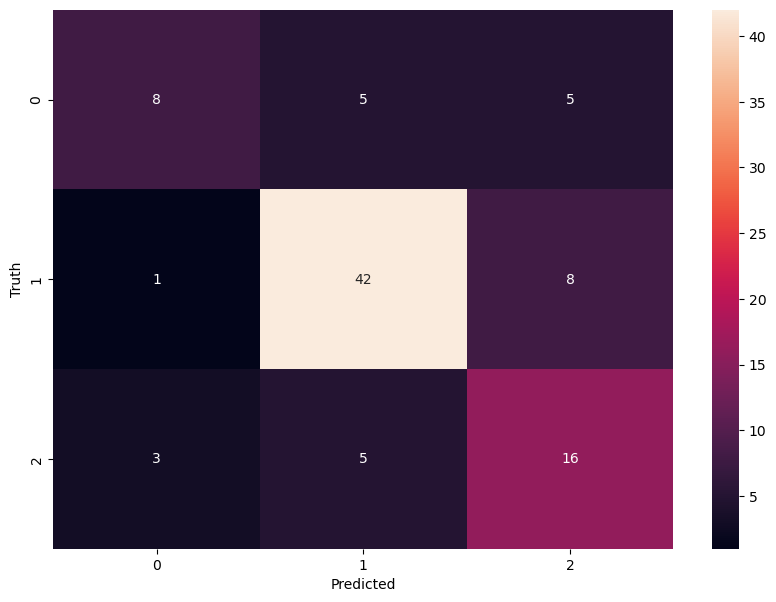

In [44]:
best_clf = best_estimators['svm']

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')